In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../ELPH/")
sys.path.append("../derrom/")

import ELPH
import ELPH_utils

import derrom

#global hyperparameters
kmax = 2.
n_kmax = 200

tmax = 2000
n_tmax = 400


system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)

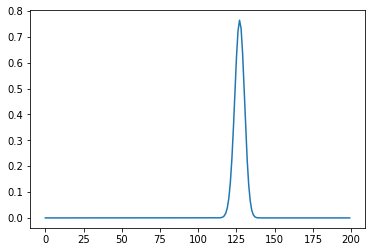

In [2]:
init = system.get_init_cond_gauss(max_pos = 0.5/4, width = 0.025/4, density=0.05/4)
plt.plot(init[:n_kmax])
plt.show()


full_trajectory = system.get_full_trajectory(init,tmax=tmax, n_tmax=n_tmax)

In [3]:
el_trajectory = full_trajectory[:,0,:]

ELPH_utils.save_runs([el_trajectory], '../../example_trajectory')

In [4]:
# el_trajectory = ELPH_utils.load_runs(filename='../../example_trajectory.npz')[0]
# print('example trajectory loaded with shape: ', el_trajectory.shape)

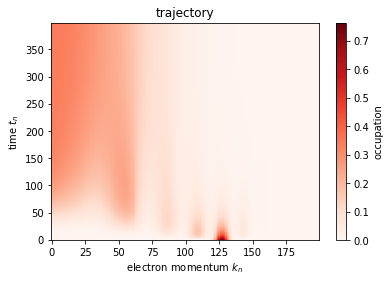

In [5]:
derrom.utils.plot_trajectory(el_trajectory)

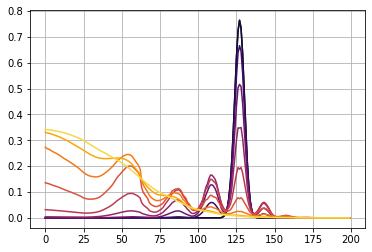

In [6]:

colors = plt.get_cmap('inferno')
tn_arr = np.geomspace(1,n_tmax,10,dtype=int)-1


plt.grid()

for k,tn in enumerate(tn_arr):
    plt.plot(el_trajectory[tn], '-', c=colors(k/len(tn_arr)))

plt.show()

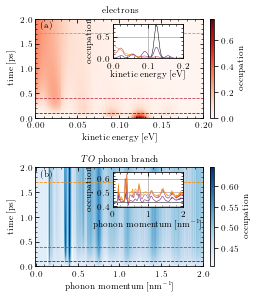

In [7]:
electrons = full_trajectory[:,0,:]
phonons = full_trajectory[:,1,:]
tvals = np.linspace(0,tmax,n_tmax)

E_el = system.electron_dispersion(np.linspace(0,kmax,electrons.shape[1],endpoint=True))
k_arr = np.linspace(0,kmax,phonons.shape[1],endpoint=True)


# tn_arr = [0,15,80,350]

tn_arr = np.array([0,0.1,0.4,1.7])*400/2.0
tn_arr = tn_arr.astype(int)


E_el_max = 0.2

####################################################
####################################################
####################################################

# %matplotlib notebook

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 9
fig = plt.figure(figsize=(3.40457,4))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,0.025], height_ratios=[1,1])




####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

plt.title('electrons', fontsize=fs)

# extent = [0,tmax*1e-3, 0, kmax]
# plt.imshow(electrons, aspect='auto', origin='lower', extent=extent, interpolation='none', cmap='Reds')
im = plt.pcolormesh(E_el,tvals*1e-3,electrons, cmap='Reds', shading='auto', rasterized=True)


for k,tn in enumerate(tn_arr):
    plt.axhline(y=tvals[tn]*1e-3, xmin=0, xmax=1, ls='--', color=colors(k/len(tn_arr)),  lw = 0.8)


plt.xlabel('kinetic energy [eV]')
plt.ylabel('time [ps]')

plt.ylim(0,2)
plt.xlim(0,E_el_max)

# cbar = plt.colorbar()
# cbar.set_label('occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')


ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


axins = ax00.inset_axes([0.46, 0.6, 0.42, 0.35])

colors = plt.get_cmap('inferno')
# tn_arr = np.geomspace(1,n_tmax,5,dtype=int)-1

axins.grid()
for k,tn in enumerate(tn_arr):
    axins.plot(E_el,electrons[tn], '-', c=colors(k/len(tn_arr)),  lw = 0.5)

axins.set_xlabel('kinetic energy [eV]', labelpad=1)
axins.set_ylabel('occupation')
axins.set_xlim(0,E_el_max)
axins.set_ylim(0,0.8)

axins.xaxis.set_ticks_position('both')
axins.yaxis.set_ticks_position('both')
axins.tick_params(which='both', direction='in', color='k')

axins.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axins.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

axins.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
axins.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#axins.yaxis.set_major_formatter(ticker.NullFormatter())
#axins.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


axCB = plt.subplot(gs[0,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r"occupation")


####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[1,0])

plt.title('$TO$ phonon branch', fontsize=fs)

# extent = [0,tmax*1e-3, 0, kmax]
# plt.imshow(electrons, aspect='auto', origin='lower', extent=extent, interpolation='none', cmap='Reds')
im = plt.pcolormesh(k_arr,tvals*1e-3,phonons, cmap='Blues', shading='auto', rasterized=True)


for k,tn in enumerate(tn_arr):
    plt.axhline(y=tvals[tn]*1e-3, xmin=0, xmax=4, ls='--', color=colors(k/len(tn_arr)),  lw = 0.8)


plt.xlabel('phonon momentum [nm$^{-1}$]')
plt.ylabel('time [ps]')

plt.ylim(0,2)
# plt.ylim(0,0.7)

# cbar = plt.colorbar()
# cbar.set_label('occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')


ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


axins = ax00.inset_axes([0.46, 0.6, 0.42, 0.35])

colors = plt.get_cmap('inferno')
# tn_arr = np.geomspace(1,n_tmax,5,dtype=int)-1



axins.grid()
for k,tn in enumerate(tn_arr):
    axins.plot(k_arr,phonons[tn], '-', c=colors(k/len(tn_arr)), lw = 0.5)

axins.set_xlabel('phonon momentum [nm$^{-1}$]', labelpad=1)
axins.set_ylabel('occupation')
axins.set_xlim(0,2.0)
# axins.set_ylim(0,0.8)

axins.xaxis.set_ticks_position('both')
axins.yaxis.set_ticks_position('both')
axins.tick_params(which='both', direction='in', color='k')

axins.xaxis.set_major_locator(ticker.MultipleLocator(1))
axins.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

axins.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
axins.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
#axins.yaxis.set_major_formatter(ticker.NullFormatter())
#axins.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

axCB = plt.subplot(gs[1,1])

cb = plt.colorbar(im, cax = axCB)
cb.set_label(r"occupation")


####################################################
####################################################
####################################################

# plt.tight_layout()

plt.subplots_adjust(left=0.12, bottom=0.09, right=0.85, top=0.95, wspace=0.08, hspace=0.5)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/dynamics.pdf', dpi=300)
plt.show()
